<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_21_Distribuci%C3%B3n_de_probabilidad_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución de probabilidad normal

# Objetivo

Calcular probabilidades, valor esperado y variabilidad de datos de varibles aleatorias con comportamiento de distribución  normal.


# Descripción

- Se cargan librerías adecuadas
- Se cargan funciones adecuadas
- Se describen ejercicios extraídos de literatura de contexos diversos con caraterísticas de distribuciones normales.
- Se calculan probabilidades
- Se calculan valores esperados y variabilidad de los datos,
- Se calculan números aleatorios
- Se calculan valores de variable aleatoria $x$ a partir de probabilidades específicas. PENDIENTE ESTE ULTIMO PUNTO


# Fundamento teórico

La distribución continua de probabilidad más importante en todo el campo de la estadística es la distribución normal. Su gráfica, que se denomina curva normal, es la curva con forma de campana .

La distribución normal a menudo se denomina distribución Gaussiana, en honor de Karl Friedrich Gauss (1777-1855), quien también derivó su ecuación a partir de un estudio de errores en mediciones repetidas de la misma cantidad [@walpole2012].

## Fórmula de densidad

$$
f(x) =\frac{1}{\sigma \cdot \sqrt{2 \cdot \pi}}\cdot e
^{\frac{-1}{2}\cdot ( \frac {x - \mu}{\sigma}) ^2}
$$

En donde: $π=3.14159$ y $e=2.71828$.

## Función de Distribución Acumulativa (CDF):

La CDF es una función que proporciona la probabilidad acumulativa de que una variable aleatoria sea menor o igual a un valor específico. Se denota como:
$$
F(x) = \int_{-∞}^{x}f(x)dx
$$

donde $f(x)$ es la PDF.

## Valor Esperado (Media)

El valor esperado de una variable aleatoria continua se calcula como el promedio ponderado de todos los valores posibles, donde el peso es dado por la PDF. Matemáticamente, se expresa como
$$
\mu_{x} = VE(x) = \int_{-\infty}^{\infty}x\cdot f(x)dx
$$

## Varianza y Desviación Estándar:

La varianza y la desviación estándar miden la dispersión de una variable aleatoria continua. La varianza se calcula como:

$$
varianza = \sigma^2=V(x)=\int_{-\infty}^{\infty}(x - \mu)^2\cdot f(x) dx
$$
, donde $\mu$ es la media, y la desviación estándar es la raíz cuadrada de la varianza

$$
\sigma = \sqrt{\sigma^2}
$$

## Funciones de python

En python se pueden utilizar las siguientes funciones para tratar con una distribución normal:

- *norm.rvs()* para calcular números aleatorios.
- *norm.pdf()* para calcular la densidad.
- *norm.cdf()* para calcular la probabilidad acumulada.
- *norm.ppf()* para calcular el valor de la a partir de una probabilidad, es la función inversa de *cdf()*.



# Desarrollo


## Cargar librerías

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

## Cargar funciones

In [ ]:
# Densidad normal
def f_x_normal(x, media, desv_std):
  # Calcular la PDF de la variable aleatoria continua
  fx = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
  return fx

# Función para visualizar la densidad de probabilidad de una distribución normal
def f_visualizar_dens_normal(valores):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne st´dnar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la crear una densidad
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std **2))

    # Visualizar la PDF
    plt.plot(x, pdf, label='Normal:(media:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    # plt.grid(True)
    plt.show()

def f_visualizar_dens_area_normal(valores, a, b, prob=0, v_color = 'red'):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne estándar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la PDF
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))

    # LA probailidad
    prob  = norm.cdf(b, media, desv_std) - norm.cdf(a, media, desv_std)
    # Visualizar la PDF
    plt.plot(x, pdf, label='Normal:(me:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    if prob == 0:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color=v_color, label='Área bajo la curva')
    else:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color=v_color, label='Área '+str(a) + "-"+str(b)+"="+str(np.round(prob * 100, 2))+"%")

    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend(loc='upper right')
    # plt.grid(True)
    plt.show()

def f_visualizar_frecuencia(frecuencia):
  # Crear gráfico de barras
  plt.bar(frecuencia.index, frecuencia)

  # Agregar etiquetas y título
  plt.xlabel('Variable')
  plt.ylabel('Frecuencia')
  plt.title('Frecuencia en los Datos')

  # Mostrar el gráfico
  plt.show()

def f_visualizar_VE_desv_std_normal(valores):
  # Se calcula la media de los valores
  VE = media = np.mean(valores)

  # Se calcula la desviacióne st´dnar de los valores
  desv_std = np.std(valores)

  # Crear un rango de valores para la PDF
  x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

  # Calcular la PDF de la distribución normal
  pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
  plt.plot(x, pdf, label='Normal:(me:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))

  # Agregar una línea punteada
  plt.axvline(x=VE, color='red', linestyle='--', label='VE='+str(np.round(VE, 2)))
  plt.axvline(x=VE - desv_std, color='blue', linestyle='--', label='Desv. Std='+str(np.round(desv_std, 2)))
  plt.axvline(x=VE + desv_std, color='blue', linestyle='--')

  # La probadilidad de VE ± desv_std
  a = VE - desv_std
  b = VE + desv_std
  prob  = norm.cdf(b, media, desv_std) - norm.cdf(a, media, desv_std)

  plt.fill_between(x, 0, pdf, where=(x >= VE - desv_std) & (x <= VE + desv_std), alpha=0.3, color='red', label='Área '+str(np.round(VE - desv_std, 2)) + "-"+str(np.round(VE + desv_std, 2))+ "="+str(np.round(prob, 2)))


  plt.title('VE y desviación estándar de los datos. Distribución Normal')
  plt.xlabel('Valor de x')
  plt.ylabel('Densidad de Probabilidad')
  plt.legend(loc='upper right')
  # plt.grid(True)
  plt.show()





## Calcular una densidad para un valor de x

Ejemplo de calcular la densidad para un valor de $x$ de acuerdo a la distribución normal con media y desviación.

- Valor de x=70;
- media=80;
- desv=5;
- e=2.71828;
- pi=3.14159

Para el ejemplo siguiente se utilzia el cálcuo de la densidad manualemnte y luego con la función *norm.pdf()*; deben salir los mismos valores para un valor de $x = 70$, con media $\mu= 80$ y desviación estándar $\sigma= 5$


In [ ]:
x = 18
media = 20
desv_std = 5
v_e = 2.71828
v_pi = 3.14159

densidad_1 = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
print ("La densidad de x = ", x, " es ", np.round(densidad_1, 4))

# Usando norm.pdf() de la librería norm
densidad_2 = norm.pdf(x, media, desv_std)
print ("La densidad de x = ", x, " es ", np.round(densidad_2, 4))

La densidad de x =  18  es  0.0737
La densidad de x =  18  es  0.0737


## Calcular números aleatorios

Se puede generar números aletorios mediante la función de la bilioteca *numpy* con la función *random.normal(media, desviación, size)*.

La función de generación de números aletorios requiere el valor de la media y la desviación de los datos así como la cantidad de números aleatorios a generar.

Ls siguiente instrucción genera 10 números aleatorios con media igual a $\mu = 80$ y desviación estándar de $\sigma = 5$

## Semilla para números aleatorios

La semilla *np.random.seed(2023)* significa que al ejecutar todo el código de nuevo se generan los mismos valores aleatorios. Esto es muy recomendable para simulación. El valor del argumento puede ser cualueir valor numérico, aquí se le pone el año de edición de este documento 2023.

In [ ]:
np.random.seed(2023)

In [ ]:
# Generar 10 números aleatorios de una distribución normal con media 0 y desviación estándar 1
num_aleatorios = np.random.normal(80, 5, 100)
print(np.round(num_aleatorios, 4))

[83.5584 78.3776 74.9906 81.1813 79.4892 74.2935 93.272  87.203  80.4945
 64.3923 74.6174 78.3716 74.8225 77.8684 74.8532 77.3911 77.8862 79.5038
 73.0987 81.5095 74.832  72.4891 73.102  78.9777 83.2106 79.0941 83.8587
 83.7076 86.6238 82.1964 77.2106 84.6354 76.9964 72.4013 90.4866 84.4628
 87.9824 76.8062 74.3348 83.283  82.9789 75.9444 78.4973 85.042  74.5612
 71.0646 81.7031 73.7325 81.8539 82.2763 68.5814 79.9959 91.9944 67.0845
 86.555  72.1026 75.7966 79.1725 69.6579 82.2637 80.2557 78.8097 78.96
 82.0065 80.9158 86.1792 78.541  80.15   75.658  83.0217 83.6428 86.8241
 86.7135 72.7165 84.8468 80.1827 92.1591 82.113  89.2196 78.8922 81.6856
 77.2141 80.2657 85.269  76.7074 89.2222 79.6224 81.3213 73.0232 83.5421
 83.8138 81.8365 77.1159 77.92   79.3123 86.4749 82.6029 79.0286 78.072
 64.6711]


Se puede generar números aletorios mediante la función *norm.rvs(loc = 80, scale = 5, size = 10)* de la biblioteca scipi.stats.

Se generan 10 números aletorios con media igual a  $μ=80$  y desviación estándar de  $\sigma=5$

In [ ]:
num_aleatorios = norm.rvs(loc = 80, scale = 5, size = 100)
print(np.round(num_aleatorios, 4))

[76.6591 80.2848 75.4532 72.5604 85.8481 81.9684 82.6528 77.0679 85.2825
 76.3304 79.5802 80.6364 81.7221 83.4298 81.9995 84.4673 81.924  83.2056
 77.1134 75.9003 83.7341 89.184  72.7225 75.8564 76.9543 74.6435 74.0653
 77.2968 76.8075 80.7521 84.5973 84.5507 88.0262 83.3358 84.7517 83.6716
 85.0773 83.1369 85.3133 81.3144 69.5676 74.6182 77.4624 78.6275 89.2441
 76.5076 76.0882 73.9187 87.1332 85.3385 80.4362 69.0328 87.6492 77.2182
 82.2208 76.5899 69.6029 80.9564 75.3949 80.6887 82.5452 81.0169 76.838
 78.2226 82.2859 84.0954 89.6552 80.8094 85.1488 79.0565 76.5604 81.3068
 74.8204 74.7335 76.0889 78.2956 78.1652 92.9462 78.4508 77.0163 76.7305
 80.9741 82.6297 75.8034 81.9243 92.7159 71.6058 81.2337 83.9493 88.6464
 74.4627 80.906  80.6391 74.6693 86.4834 81.3576 85.567  71.2871 76.8716
 81.3394]


## Calcular la densidad de los números aleatorios

Se utiliza la función *f_x_normal()* previamente preparada para calcular la densidad de cada valor de números aletorios de acuerco con la fórmula de densidad de una distribución  normal.

Se calcula primero, la media y la desviación estándar de los datos.

In [ ]:
media = np.mean(num_aleatorios)
desv_std = np.std(num_aleatorios)
densidad = f_x_normal(num_aleatorios, media, desv_std)
print ("La media de los números aleatorios es: ", np.round(media, 4))
print ("La desv. std de los números aleatorios es: ", np.round(desv_std, 4))
print("Las densidades: ")
print (np.round(densidad, 4))

La media de los números aleatorios es:  80.1603
La desv. std de los números aleatorios es:  4.9653
Las densidades: 
[0.0627 0.0803 0.0513 0.0249 0.0417 0.0752 0.0708 0.0662 0.0472 0.0597
 0.0798 0.08   0.0765 0.0647 0.075  0.0552 0.0754 0.0666 0.0666 0.0556
 0.062  0.0154 0.0262 0.0552 0.0652 0.0433 0.0378 0.068  0.064  0.0798
 0.0539 0.0543 0.0229 0.0655 0.0524 0.0626 0.0492 0.0671 0.0469 0.0782
 0.0083 0.0431 0.0693 0.0766 0.0151 0.0613 0.0574 0.0365 0.03   0.0466
 0.0802 0.0065 0.0258 0.0674 0.0737 0.062  0.0084 0.0793 0.0507 0.0799
 0.0716 0.0792 0.0642 0.0745 0.0733 0.0587 0.0129 0.0797 0.0485 0.0784
 0.0618 0.0782 0.0451 0.0442 0.0574 0.0749 0.0741 0.0029 0.0757 0.0658
 0.0633 0.0793 0.071  0.0547 0.0754 0.0033 0.0182 0.0785 0.0601 0.0186
 0.0416 0.0794 0.08   0.0436 0.0357 0.078  0.0444 0.0163 0.0645 0.0781]


## Visualizar densidad

Con los valores de los números aleatorios generados y la densidad de los mismos, se visualiza la curva de campana de la distribución  normal.

Se utiliza la función previamente codificada para mostar la densidad de la distribucuón normal *f_visualizar_dens_normal(valores, media, desviacion_estandar)*.



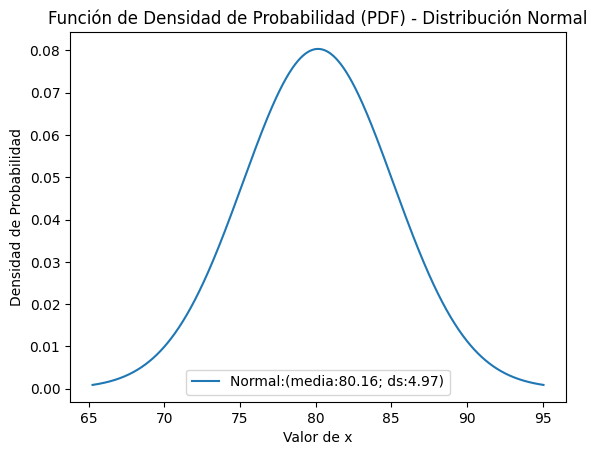

In [ ]:
f_visualizar_dens_normal(num_aleatorios)

## Calcular probabilidades

Ahora bien con una densidad calculada de cada uno de los valores aleatrios generdos, ahora se puede calcular probabildia bajo un inetrvalo.

¿Cuál es la probabilidad de encontrar números entre 80 y 85?

$$
F(80 \le x \le 85)
$$

$$
F(x \le 85) - F(x \le 80)
$$

Se utiliza la función *norm.cdf()*, restando la probabilidad acumulada de 85 menos la probabilidad acumulada de 80.

In [ ]:
x1 = 80
x2 = 85
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamnte ", np.round(probabilidad * 100, 2))

La probabilidad entre  80  y  85  es 0.348 aproximadamnte  34.8


## Visualizar probabildiades

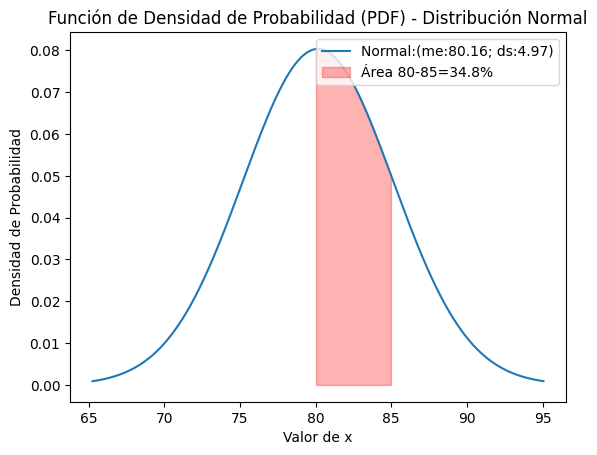

In [ ]:
f_visualizar_dens_area_normal(num_aleatorios, x1, x2)

## Ejercicio estaturas pesos y generos de personas

Se carga un archivo con extensión *csv* que contiene medidas de personas. Las variables de interés son estatura en centímetros, peso en kilogramos y género que puede ser Hombre o Mujer.


### Cargar datos y análisis descriptivo

Se cargan datos y se presenta un análisis descriptivo de la cantidad de registros ,los estadísticos básicos de las variables estatura y peso así como la frecuencia por género.

Son $n=507$ registros de los cuales hay $260$ mujeres y $247$ hombres.

La media aritmética de la variable estatura es $171.14$ con desviación estándar de $9.40$; la media de la variable peso es $69.14$ con desviación estándar de $13.34$

     estatura  peso genero_cat
0       174.0  65.6     Hombre
1       175.3  71.8     Hombre
2       193.5  80.7     Hombre
3       186.5  72.6     Hombre
4       187.2  78.8     Hombre
..        ...   ...        ...
502     176.5  71.8      Mujer
503     164.4  55.5      Mujer
504     160.7  48.6      Mujer
505     174.0  66.4      Mujer
506     163.8  67.3      Mujer

[507 rows x 3 columns]
         estatura        peso
count  507.000000  507.000000
mean   171.143787   69.147535
std      9.407205   13.345762
min    147.200000   42.000000
25%    163.800000   58.400000
50%    170.300000   68.200000
75%    177.800000   78.850000
max    198.100000  116.400000
Mujer     260
Hombre    247
Name: genero_cat, dtype: int64


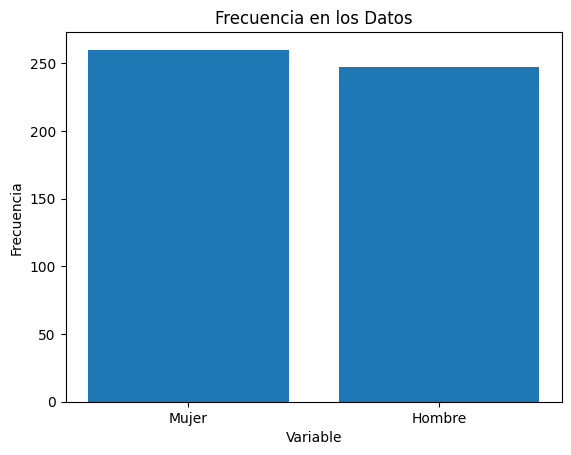

In [ ]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2023/datos/estatura%20peso%20generos.csv")
print(datos[['estatura', 'peso', 'genero_cat']])

print(datos[['estatura', 'peso']].describe())
# Determinar la frecuencia de cada atributo en la columna 'genero'
frecuencia_genero = datos['genero_cat'].value_counts()

# Imprimir la frecuencia
print(frecuencia_genero)

f_visualizar_frecuencia(frecuencia_genero)


### Valor esperado, varianza y desviación estándar

El valor esperado de una distribución  normal es igual a la media y la varianza es la propia varianza de los datos, así mismo la desvición es´tandra es la rai cuadrada de la varinza.



### Valor esperado

Si se elige a una persona aleatoriamente, ¿cuál será el valor esperado $VE$ de la estatura de la persona?, ¿cuánto puede variar la estatura con respeto al valor esperado $VE$?

El valor esperado es:  171.144  centímetros
En términos de varianza puede variar en: :  88.321
En términos de desvaición estándar puede variar en: :  9.3979  centímetros


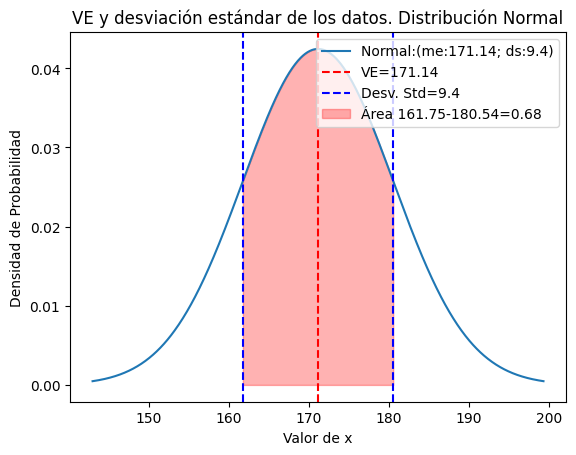

In [ ]:
VE = np.mean(datos['estatura'])
print ("El valor esperado es: ", np.round(VE, 3), " centímetros")
varianza = np.var(datos['estatura'], )
print ("En términos de varianza puede variar en: : ", np.round(varianza, 4))
varianza = np.std(datos['estatura'], )
print ("En términos de desvaición estándar puede variar en: : ", np.round(varianza, 4), " centímetros")

f_visualizar_VE_desv_std_normal(datos['estatura'])

Hay un $68\%$ de probabilidad de seleccionar a una persona que tenga de estatura $171.14$ $\pm 9.4$ centímetros.

Se puede concluir en t´merios generales, que la mayoría de las personas tendrán una estatura alrededor de $171$ centímetros, y la mayoría de las diferencias estarán dentro de una desviación estándar de $9.4$ centímetros.

- El $68\%$ de los datos está entre $\mu \pm \sigma$.
- El $95\%$ de los datos está entre $\mu \pm 2 \cdot \sigma$.
- El $99\%$ de los datos está entre $\mu \pm 3 \cdot \sigma$.



### Probabilidades con datos del género hombres

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura mayor que 180 centímetros?



In [ ]:
# Filtrar datos para obtener solo los hombres
 #datos_hombres = datos[datos['genero'] == 'Hombre']
datos_hombres = datos.query("genero_cat == 'Hombre'")
#print(datos_hombres['estatura'])
# Media estatura de hombres
media_est_hombres = np.mean(datos_hombres['estatura'])
desv_std_est_hombres = np.std(datos_hombres['estatura'])
print ("La media de estatura hombres", np.round(media_est_hombres, 4))
print ("La desviación estándar de estatura hombres", np.round(desv_std_est_hombres, 4))

La media de estatura hombres 177.7453
La desviación estándar de estatura hombres 7.1691


Con los estadístico de media y desviacón estándar y los valores, visualizar la densidad y el área de hombre con estatura maypr que $180$.

$$
F(x \ge 180)
$$

Restar:

$$
1 - F(x \le 180)
$$

para determinar los que están o son mayores que $180$.


La probabilidad entre  180  y  inf  es 0.3766 aproximadamente  37.66


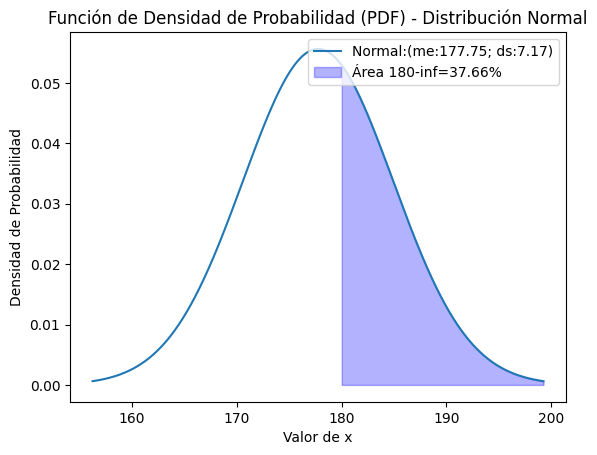

In [ ]:
x1 = 180
x2 = np.Inf
probabilidad  = 1 - norm.cdf(x1, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2, v_color = 'blue')

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura entre 160 y 180 centímetros?

$$
F(160 \le x \le 180)
$$

Restar:

$$
F(x \le 180) - F(x \le 160)
$$

para determinar los que están en el intervalo $160$ - $180$

La probabilidad entre  160  y  180  es 0.6168 aproximadamente  61.68


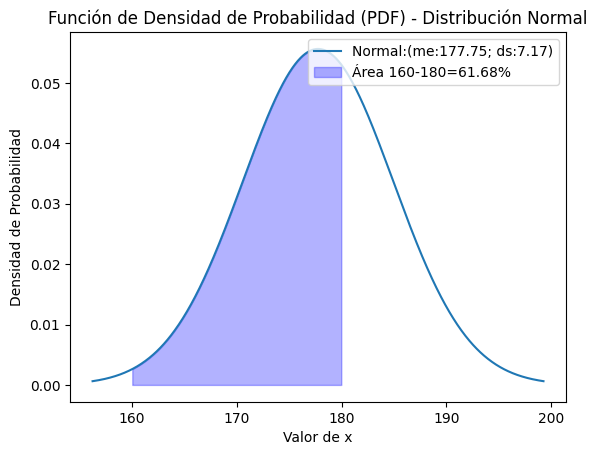

In [ ]:
x1 = 160
x2 = 180
probabilidad  = norm.cdf(x2, media_est_hombres, desv_std_est_hombres) - norm.cdf(x1, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2, v_color = 'blue')

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura menor o igual a 165 centímetros?

$$
F(x \le 165)
$$

para determinar los que están en el intervalo por debajo de $165$

La probabilidad entre  -inf  y  165  es 0.0377 aproximadamente  3.77


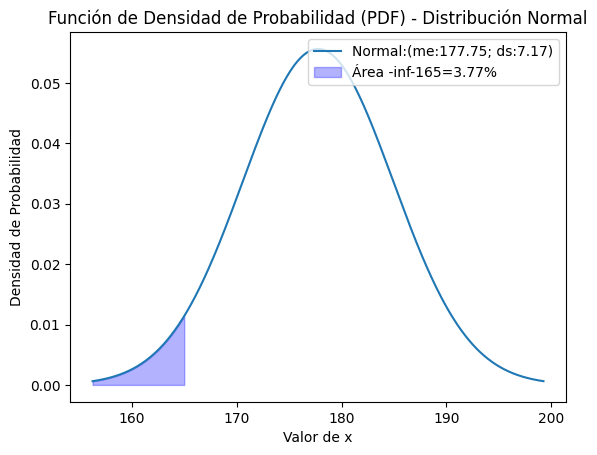

In [ ]:
x1 = - np.Inf
x2 = 165
probabilidad  = norm.cdf(x2, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2, v_color = 'blue')

### Probabilidade con datos del género mujeres


#### ¿Cúal es la probabilidad de encontrar personas del género mujeres con estatura mayor que 180 centímetros?

In [ ]:
# Filtrar datos para obtener solo las mujeres
datos_mujeres = datos.query("genero_cat == 'Mujer'")

# Media estatura de mujeres
media_est_mujeres = np.mean(datos_mujeres['estatura'])
desv_std_est_mujeres = np.std(datos_mujeres['estatura'])
print ("La media de estatura mujeres", np.round(media_est_mujeres, 4))
print ("La desviación estándar de estatura mujeres", np.round(desv_std_est_mujeres, 4))

La media de estatura mujeres 164.8723
La desviación estándar de estatura mujeres 6.532


Con los estadístico de media y desviacón estándar y los valores, visualizar la densidad y el área de la probabilidad con estatura mayr que $180$ en mujeres:

La probabilidad entre  180  y  inf  es 0.0103 aproximadamente  1.03


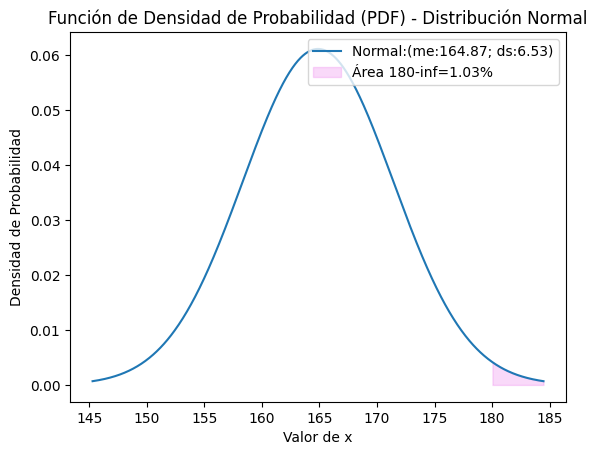

In [ ]:
x1 = 180
x2 = np.Inf
probabilidad  = 1 - norm.cdf(x1, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2, v_color = 'violet')

#### ¿Cúal es la probabilidad de encontrar personas del género mujeres con estatura entre 160 y 180 centímetros?



La probabilidad entre  160  y  180  es 0.7619 aproximadamente  76.19


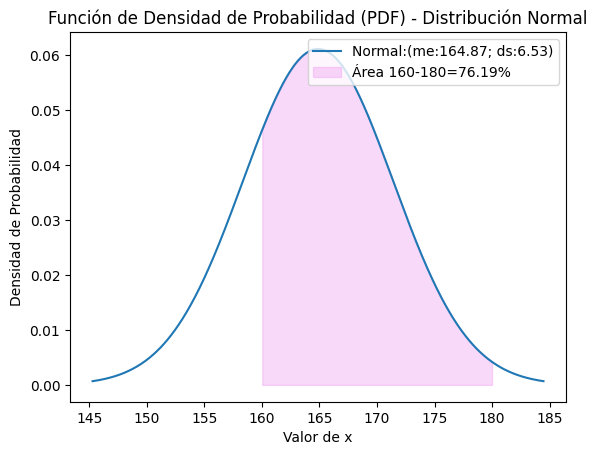

In [ ]:
x1 = 160
x2 = 180
probabilidad  = norm.cdf(x2, media_est_mujeres, desv_std_est_mujeres) - norm.cdf(x1, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2, v_color = 'violet')

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura menor o igual a 165 centímetros?

La probabilidad entre  -inf  y  165  es 0.5078 aproximadamente  50.78


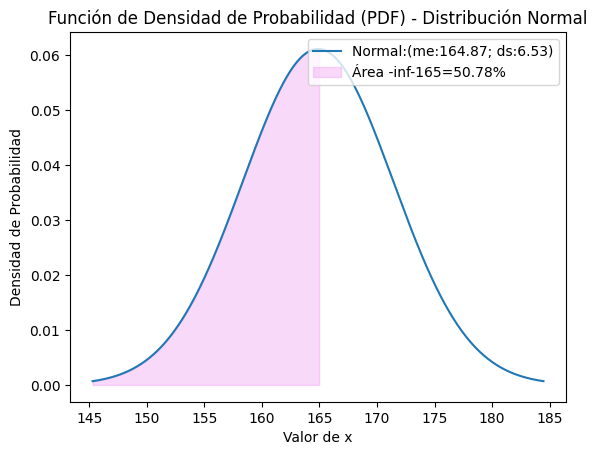

In [ ]:
x1 = - np.Inf
x2 = 165
probabilidad  = norm.cdf(x2, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2, v_color = 'violet')

### Con respecto al peso de las personas hombre y mujeres

- ¿cuál es el valor esperado $VE$ si se selecciona a una persona al azar con respecto al peso corporal, independientemente si es hombre o mujer?
- ¿cuál es la varianza del peso corporal de las personas?
- ¿cuál será la desviación estándar con respeco al peso corporal, independientemente si es hombre o mujer ?


####  Con repecto al peso en kilogramos de los hombres

- ¿Cuál es la probabilidad de encontrar hombres con un peso coporal superior a $80$ kilogramos; $1 - F(x \le 80)$
- ¿Cual es la probabilidad de encontrar hombres con un peso corporal entre $70$ y $75$ kilogramos?; $F(70 \le x \le 75)$
- ¿Cuál es la probabilidad de encontrar hombres que pesen menos de $65$ kilogramos?; $F(x \le 65)$

####  Con repecto al peso en kilogramos de las mujeres

- ¿Cuál es la probabilidad de encontrar mujeres con un peso coporal superior a $80$ kilogramos; $1 - F(x \le 80)$
- ¿Cual es la probabilidad de encontrar mujeres con un peso corporal entre $70$ y $75$ kilogramos?; $F(70 \le x \le 75)$
- ¿Cuál es la probabilidad de encontrar mujeres que pesen menos de $65$ kilogramos?; $F(x \le 65)$



## Tiempo de duración de focos

Una empresa de material eléctrico fabrica focos de luz que tienen una duración, antes de quemarse (fundirse), que se distribuye *normalmente* con media igual a $\mu = 800$ horas y una desviación estándar de $\sigma = 40$ horas. Ejercicio extraído de [@walpole_probabilidad_2012].

Encuentre las siguientes probabilidades:

- ¿cuál es la probabilidad de que un foco se queme entre 778 y 834 horas?; $F(778 \le x \le 834)$.
- ¿cuál es la probabilidad de que un foco se queme a más de 850 horas?; $1 - F(x \le 850)$
- ¿cuál es el valor esperado $VE$ y la desviación estándar y qué significan para este contexto?

### Inicializar variables

In [ ]:
# Inicializar variables
media = 800
desv_std = 40

# Se generan datos aleatorios con media y desviacin estándar similar
datos = norm.rvs(loc = media, scale = desv_std, size = 100)
print ("Los datos")
print(np.round(datos, 4))

print()
media = np.mean(datos)
desv_std = np.std(datos)

print ("La media de los datos es", np.round(media, 2))
print ("La desviación estándar de los datos es: ", np.round(desv_std, 2))


Los datos
[837.1718 839.4933 791.6324 839.1078 827.6855 758.0585 803.2116 819.606
 771.0048 752.2199 858.2438 843.1854 854.7683 846.5657 740.4298 881.888
 734.1747 854.8282 848.7054 813.174  880.5565 796.9008 737.9982 801.347
 846.7895 774.0666 809.9507 767.     816.1266 805.4374 775.7899 812.6092
 854.7745 778.1739 726.4646 836.1842 863.4957 746.2375 891.0661 793.3719
 809.1342 829.0792 719.4085 789.067  778.743  851.2807 805.565  780.2302
 801.9845 727.3402 701.5134 860.1921 797.5402 817.3954 808.0812 788.9809
 778.0682 826.498  795.2679 732.6299 802.7912 769.0098 787.4855 786.6401
 802.1166 827.0862 816.7587 770.773  762.2152 848.4661 818.74   772.6316
 749.7069 812.0711 749.8792 774.8072 816.1685 751.6413 810.904  784.0986
 766.231  782.9297 808.0189 776.4617 809.1841 796.7533 770.7151 777.6941
 804.8336 760.3908 834.5992 773.3154 742.1255 870.6431 830.5958 848.5374
 775.9745 743.7851 770.9411 761.2014]

La media de los datos es 798.46
La desviación estándar de los datos es:  39.91

 ### probabilidad de que un foco se queme entre 778 y 834 horas?;  F(778≤x≤834) .


La probabilidad entre  778  y  834  es 0.5093 aproximadamente  50.93


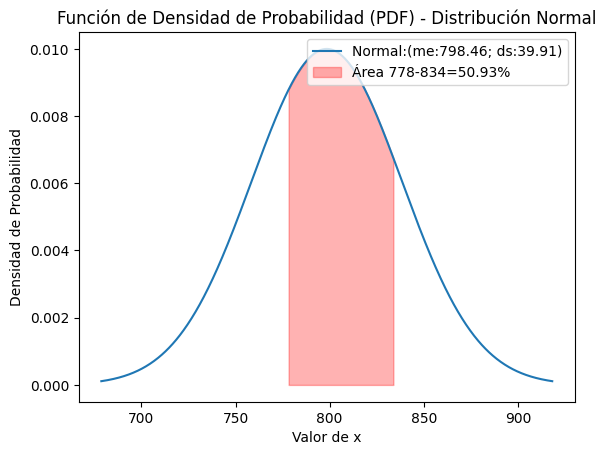

In [ ]:
# El intervalo
x1 = 778
x2 = 834

# La probabilidad
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos, x1, x2, v_color = 'red')

### Probabilidad de que un foco se queme a más de 850 horas?;  1−F(x≤850)

La probabilidad entre  850  y  inf  es 0.0983 aproximadamente  9.83


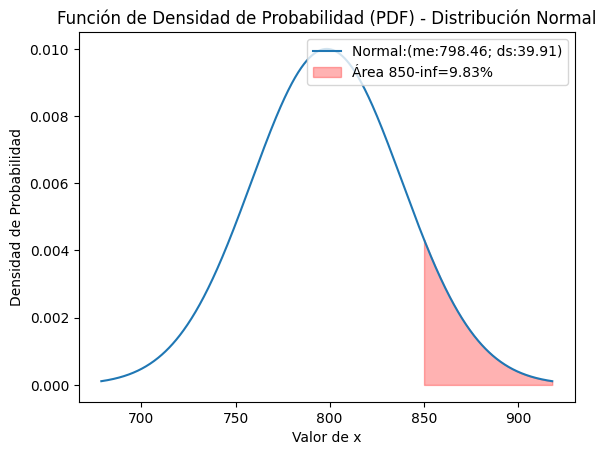

In [ ]:
## El intervalo
x1 = 850
x2 = np.Inf

# La probabilidad
probabilidad  = 1 - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos, x1, x2, v_color = 'red')

# Eercicio de los sueldos

Los sueldos mensuales en una empresa siguen una distribución *normal* con media de *16000* pesos, y desviación estándar de 1000 pesos.

- ¿qué porcentaje de trabajadores ganan entre 10000 y 15000 pesos?; $F(10000\le x \le 15000)$
- ¿qué porcentaje de trabajadores ganan menos de 8500 pesos ?; $F(x \le 8500)$
- ¿qué porcentaje de trabajadores ganan más de 10000 pesos; $1 - F(x \le 10000)$ ?
- ¿qué significado tiene el valor esperado y la desviación estándar en este contexto?

## Ejercicio de edades de estudiantes

Un conjunto de estudiante se les pide la edad, se calcula la media y la desviación estándar y se calculan probabilidades.





### Incicializar datos


In [ ]:
datos = [18, 19, 20, 21, 22, 23, 19, 18, 19, 20,
         21, 22, 19, 19, 18, 17, 19, 20, 21, 22, 23, 19, 18, 20]

media = np.mean(datos)
desv_std = np.std(datos)

print ("La media de la edad es: ", np.round(media, 2))
print ("La desviación estándar de los datos es :", np.round(desv_std, 2))

La media de la edad es:  19.88
La desviación estándar de los datos es : 1.64


### Densidades
¿Cual es el valor de la densidad para valores en $\text {x de 18, 21 y 19.87}$?

- Densidad para $f(x=18)$
- Densidad para $f(x=21)$
- Densidad para $f(x=19.87)$


In [ ]:
densidad = f_x_normal(18, media, desv_std)
print ("La la densidadad para valores de x =", 18 ," es ", np.round(densidad, 4))
densidad = f_x_normal(21, media, desv_std)
print ("La la densidadad para valores de x =", 21 ," es ", np.round(densidad, 4))
densidad = f_x_normal(19.87, media, desv_std)
print ("La la densidadad para valores de x =", 19.87 ," es ", np.round(densidad, 4))
densidad = f_x_normal(np.Inf, media, desv_std)
print ("La la densidadad para valores de x =", np.Inf ," es ", np.round(densidad, 4))

La la densidadad para valores de x = 18  es  0.1266
La la densidadad para valores de x = 21  es  0.1922
La la densidadad para valores de x = 19.87  es  0.2431
La la densidadad para valores de x = inf  es  0.0


### Visualizar la densidad de los datos


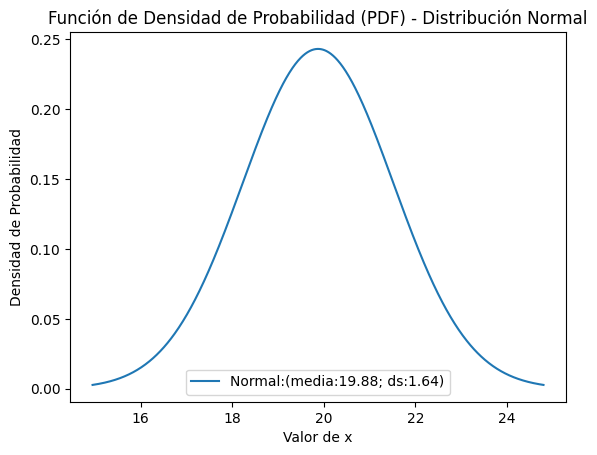

In [ ]:
f_visualizar_dens_normal(datos)

#### Probabilidad F(18 ≤  x ≤ 20 )

¿Cual es la  probabilida de elegir aleatoriamente una persona que tenga edad entre $18$ y $20$ años.




La probabilidad entre  18  y  20  es 0.4038 aproximadamente  40.38


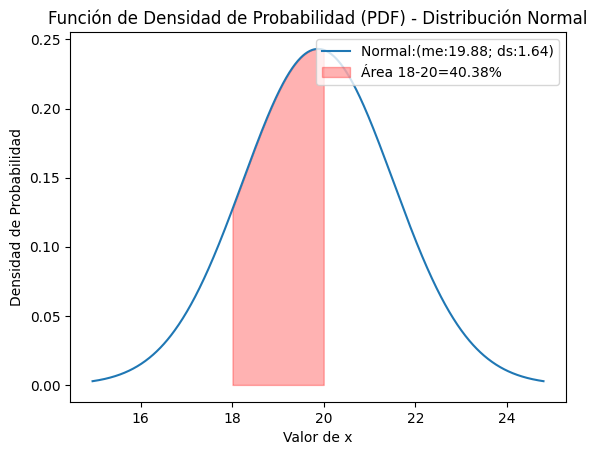

In [ ]:
## El intervalo
x1 = 18
x2 = 20

# La probabilidad
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos, x1, x2, v_color = 'red')


¿Cual es la  probabilida de elegir aleatoriamente una persona que tenga edad entre $18$ y $20$ años.
#### Probabilidad F(x ≥ 19.87 )

La probabilidad entre  19.875  y  inf  es 0.5 aproximadamente  50.0


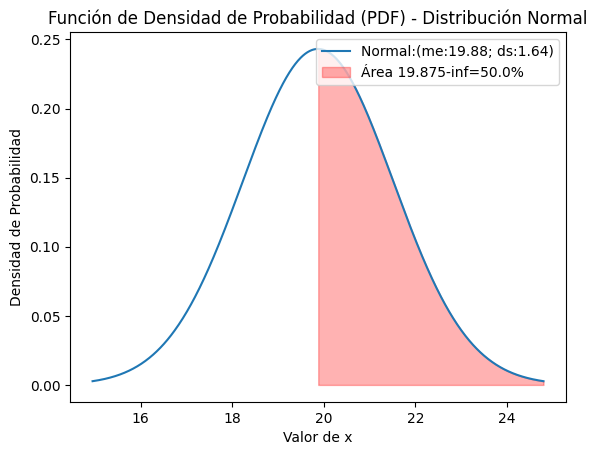

In [ ]:
## El intervalo
x1 = media
x2 = np.Inf

# La probabilidad
probabilidad  = 1 - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos, x1, x2, v_color = 'red')

# Interpretación del caso

Con los datos de estatura y peso corporal de personas cargados en el caso:

- ¿Qué es más probable: encontrar hombres por que midan por encima del $180$ centímetros de estatura o mujeres por encima del $180$ centímetros de estatura?, Con las probabilidades calculadas responda la pregunta. **Resp**: Existe una probabilidad del $37$% de encontrar hombres con estatura superior al 180 centímetros en relación al $1.03$% de encontrar mujeres por encima del $180$ centímetros de estatura por lo que es más probable que se dé la primera aseveración.

- ¿Qué es más probable: encontrar hombres por que midan por debajo o igual a $165$ centímetros de estatura o mujeres por debajo o igual a $165$ centímetros de estatura?, Con las probabilidades calculadas responda la pregunta. Es más probable encontrar mujeres con estatura por debajo del $165$ centímeros con el $50.78$% aproximadamente en relación al $3.77$% de encontrar hombres por debajo de $165$ centímetros aproximadamente.

Las probabilidades se calcularon en relación a los datos cargados.

- ¿Qué es más probable, encontrar hombres con peso superior a $80$ kilogramos o mujeres con peso superior a $80$ kilogramos?; con las probabilidades calculadas se responde la pregunta.

- Qué es más probable, encontrar hombres con un peso corporal menor a $65$ kilogramos o mujeres con peso corporal menor a $65$ kilogramos?. Con las probabilidades calculadas se responde la pregunta.

Con el ejercicio de la duración de los focos

- ¿cuál es la probabilidad de que un foco se queme entre 778 y 834 horas?;  F(778≤x≤834).
- ¿cuál es la probabilidad de que un foco se queme a más de 850 horas?;  1−F(x≤850)
- ¿cuál es el valor esperado  VE  y la desviación estándar y qué significan para este contexto?

Con el ejercicio de los sueldos:

- ¿qué porcentaje de trabajadores ganan entre 10000 y 15000 pesos?; $F(10000\le x \le 15000)$
- ¿qué porcentaje de trabajadores ganan menos de 8500 pesos ?; $F(x \le 8500)$
- ¿qué porcentaje de trabajadores ganan más de 10000 pesos; $1 - F(x \le 10000)$ ?
- ¿qué significado tiene el valor esperado y la desviación estándar en este contexto?

Con el ejercicio de edades:
- ¿Cual es el valor de la densidad para $\text {f(x) = 16, 19, 24}$.
-¿cuál es la probabilidad de encontrar alumnos entre 20 y 25 años?


# Bibliografía

- UC3M. n.d. “Introducción a La Estadística y Probabilidad.” http://halweb.uc3m.es/esp/Personal/personas/mwiper/docencia/Spanish/Introduction_to_Statistics/intro_continuous2.pdf.

- Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.